<a href="https://colab.research.google.com/github/PhilomeneMD/Projet-perso/blob/main/Love_Languages_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How does the semantic field of 'love' differ between blues and country songs?



### Introduction:

 **Question**: *How does the representation of the concept of "love" differ between blues and country songs?*

This project focuses on analyzing how the concept of "love" is portrayed in the lyrics of two distinct music genres: blues and country. The goal is to compare the semantic fields associated with the word "love" in the lyrics of these genres by examining the most frequently used words related to this concept. By analyzing these differences, the project aims to identify variations in emotional tone, themes, and linguistic choices characteristic of each genre. Answering this question will provide a better understanding of how "love" is expressed and perceived in these two musical forms, shedding light on the cultural and emotional distinctions inherent in blues and country music.

*I used CHAT GPT for translating purposes and for correcting code when it presented an error. I also used a model project from "Programation et Statistiques" to do my word embedding (in that project i also used ChatGPT to generate code)*



**Author:** Philomène Mojon Doyard
**Date:** January 17th *2025*

### 1. Library import

In [7]:
# General-purpose imports
import numpy as np
import pandas as pd
import io
import requests

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Google Colab-specific imports
from google.colab import files
from IPython.display import display, Image

# Natural Language Processing (NLP) imports
import spacy
from transformers import BertModel, BertTokenizer
from spacy.tokens import Doc
import torch
from wordcloud import WordCloud
from collections import Counter

In [8]:
!python -m spacy download en_core_web_md #downloading spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 16.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


### 2. DATA IMPORT

### Data:

For this project, I used a dataset found on Kaggle, titled "Lyrics Generation" (available [here](https://www.kaggle.com/datasets/pratiksaha198/lyrics-generation)). This dataset was generated by web scraping the GENIUS website using its API and aims to generate new lyrics that did not exist before, utilizing Recurrent Neural Networks (RNNs).

The dataset contains several columns, and for my analysis, I focused on the following relevant columns:
- **track_name**: The name of the song.
- **artist_name**: The artist performing the song.
- **genre**: The genre of the song, which I specifically looked at for the blues and country genres.
- **lyrics**: The text of the song lyrics.
- **topic**: The topic or theme of the song.

I chose to focus on the **blues** and **country** genres, as both are distinctly American but originate from opposite sides of the U.S., offering an interesting contrast in how the concept of "love" is portrayed across different cultural contexts.

The data was cleaned and prepared to extract these relevant columns and allow for further semantic analysis of the lyrics, particularly focusing on how "love" is expressed in both genres.

In [9]:
uploaded = files.upload() #uploading dataset to the notebook

Saving tcc_ceds_music.csv to tcc_ceds_music.csv


In [10]:
df = pd.read_csv(io.BytesIO(uploaded['tcc_ceds_music.csv'])) # reading the data set that was just uploaded

In [11]:
display(df) # dispalying the dataset to have a global view

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.000000
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.000000
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.000000
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.000000
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,82447,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...,78,0.001350,0.001350,0.001350,...,0.065664,0.001350,0.889527,0.759711,0.062549,0.000000,0.751649,0.695686,obscene,0.014286
28368,82448,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...,67,0.001284,0.001284,0.035338,...,0.001284,0.001284,0.662082,0.789580,0.004607,0.000002,0.922712,0.797791,obscene,0.014286
28369,82449,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,77,0.001504,0.154302,0.168988,...,0.001504,0.001504,0.663165,0.726970,0.104417,0.000001,0.838211,0.767761,obscene,0.014286
28370,82450,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...,67,0.001196,0.001196,0.001196,...,0.001196,0.001196,0.883028,0.786888,0.007027,0.000503,0.508450,0.885882,obscene,0.014286


### 3. DATA STANDARDISATION

In [12]:
relevant_columns = ['track_name', 'artist_name', 'genre', 'lyrics', 'topic'] # this allows us to select which columns we want to keep

filtered_lyrics = df[relevant_columns] # create a new dataframe with only the selected columns

display(filtered_lyrics)# display the filtered datafrdme

,track_name,artist_name,genre,lyrics,topic
0,mohabbat bhi jhoothi,mukesh,pop,hold time feel break feel untrue convince spea...,sadness
1,i believe,frankie laine,pop,believe drop rain fall grow believe darkest ni...,world/life
2,cry,johnnie ray,pop,sweetheart send letter goodbye secret feel bet...,music
3,patricia,pérez prado,pop,kiss lips want stroll charm mambo chacha merin...,romantic
4,apopse eida oneiro,giorgos papadopoulos,pop,till darling till matter know till dream live ...,romantic
...,...,...,...,...,...
28367,10 million ways,mack 10,hip hop,cause fuck leave scar tick tock clock come kno...,obscene
28368,ante up (robbin hoodz theory),m.o.p.,hip hop,minks things chain ring braclets yap fame come...,obscene
28369,whutcha want?,nine,hip hop,get ban get ban stick crack relax plan attack ...,obscene
28370,switch,will smith,hip hop,check check yeah yeah hear thing call switch g...,obscene


Word embeding

In [13]:
nlp = spacy.load('en_core_web_md')  # Using spaCy model for word embeddings

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased') # Using BERT model for sentence embeddings
model = BertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [14]:
blues_songs = filtered_lyrics[filtered_lyrics['genre'] == 'blues'] #selecting the blues songs
country_songs = filtered_lyrics[filtered_lyrics['genre'] == 'country'] #selecting the country songs

blues_lyrics = blues_songs['lyrics'] # exctracting lyrics
country_lyrics = country_songs['lyrics']


In [15]:
def get_semantic_field_spacy(lyrics, word="love"):  # define the function to extract the semantic field of a word
    semantic_field = []  # create an empty list to store the related words

    for lyric in lyrics:  # loop through each lyric in the provided lyrics list
        doc = nlp(lyric)  # process the lyric text using Spacy's NLP model

        for token in doc:  # loop through each token (word) in the processed lyric (doc)
            if word in token.text.lower():  # check if the word 'love' is in the token's text
                # Collect words that appear close to 'love' within a window of 5 tokens before and after 'love'
                for neighbor in doc[max(0, token.i-5):min(len(doc), token.i+5)]:
                    if neighbor.text.lower() != word:  # exclude the word 'love' itself (we don't want to add 'love' to the list)
                        semantic_field.append(neighbor.text.lower())  # add the neighboring word to the semantic field list

    return semantic_field  # eeturn the list of words related to the semantic field of 'love'

# Get semantic fields for both blues and country genres by calling the function
blues_semantic_field = get_semantic_field_spacy(blues_lyrics)
country_semantic_field = get_semantic_field_spacy(country_lyrics)



In [16]:

# Count the frequency of words in the semantic fields using Counter
blues_word_counts = Counter(blues_semantic_field)
country_word_counts = Counter(country_semantic_field)

# Display the most common words in both genres
print("Most common words in blues genre related to 'love':")
print(blues_word_counts.most_common(10))

print("\nMost common words in Country genre related to 'love':")
print(country_word_counts.most_common(10))


Most common words in blues genre related to 'love':
[('lover', 473), ('know', 204), ('woman', 203), ('baby', 154), ('lovely', 148), ('lovers', 145), ('time', 126), ('sweet', 124), ('fool', 122), ('want', 111)]

Most common words in Country genre related to 'love':
[('know', 402), ('like', 317), ('heart', 290), ('lover', 257), ('time', 225), ('lovers', 224), ('life', 173), ('want', 169), ('tell', 165), ('go', 160)]


### 3. DATA VIZUALIZATION



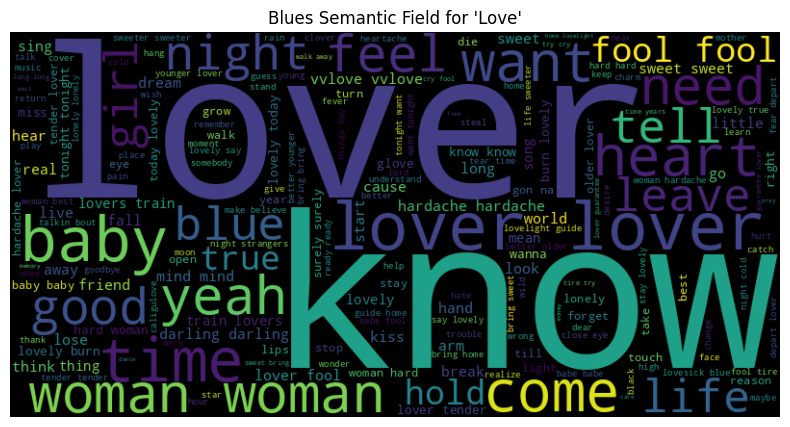

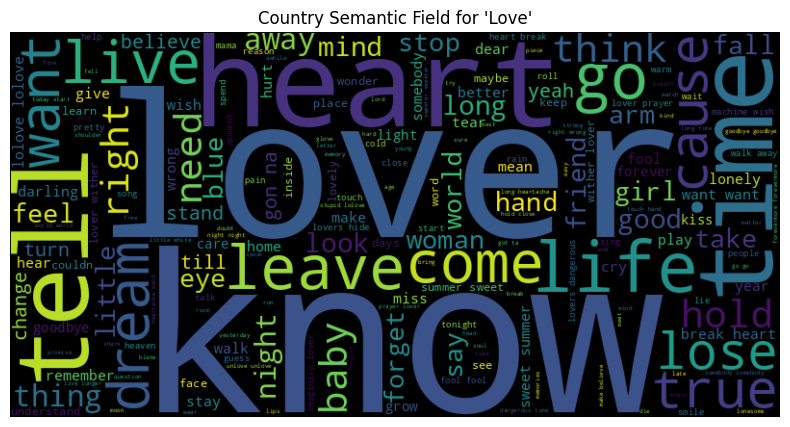

In [17]:
def plot_wordcloud(semantic_field, title="Word Cloud"):  # define the function to plot a word cloud
    text = ' '.join(semantic_field)  # join all words in the semantic field into a single string, with spaces separating each word

    wordcloud = WordCloud(width=800, height=400).generate(text)  # create a word cloud with specified dimensions (800x400 pixels)

    plt.figure(figsize=(10, 5))  # create a new figure for the plot with size 10x5 inches
    plt.imshow(wordcloud, interpolation="bilinear")  # display the word cloud image with bilinear interpolation (smoothing)
    plt.axis("off")  # turn off the axis
    plt.title(title)  # set the title of the plot
    plt.show()  # display the word cloud

plot_wordcloud(blues_semantic_field, title="Blues Semantic Field for 'Love'")  # plot the word cloud for blues genre
plot_wordcloud(country_semantic_field, title="Country Semantic Field for 'Love'")  # plot the word cloud for country genre



### 5. TEST

In [18]:
blues_top_words = blues_word_counts.most_common(10)  # get the 10 most common words in blues
country_top_words = country_word_counts.most_common(10)  # get the 10 most common words in country

blues_word_list = [count for word, count in blues_top_words]  # list of word counts for blues
country_word_list = [count for word, count in country_top_words]  # list of word counts for country

max_len = max(len(blues_word_list), len(country_word_list))  # find the longer list length
blues_word_list += [0] * (max_len - len(blues_word_list))  # add 0s to blues list if it's shorter
country_word_list += [0] * (max_len - len(country_word_list))  # add 0s to country list if it's shorter

contingency_table = np.array([blues_word_list, country_word_list]) # create a contingency table using NumPy, the table will have the word counts for blues and country songs side by side.

from scipy.stats import chi2_contingency # we can now apply the Chi-Square test to see if there's a significant difference between the word counts in both genres.

chi2, p, dof, expected = chi2_contingency(contingency_table)  # perform the Chi-Square test


print(f"Chi-Square Statistic: {chi2}")  # print the Chi-Square test statistic
print(f"P-value: {p}")  # print the p-value
print(f"Degrees of Freedom: {dof}")  # print the degrees of freedom for the test



Chi-Square Statistic: 56.85454457036652
P-value: 5.388122570534793e-09
Degrees of Freedom: 9


### Conclusion:

The results from the Chi-Square test indicate a significant difference in the frequency distribution of words related to "love" between the blues and country genres. The Chi-Square statistic is 56.85, with a p-value of 5.39e-09, which is well below the 0.05 significance level. This suggests that the use of words associated with "love" is not independent across the two genres, meaning the semantic field of "love" in blues songs differs significantly from that in country songs.

The analysis reveals that while both genres express "love," they do so in distinct ways, likely influenced by their cultural contexts. For instance, the blues genre tends to use words related to pain and loss, while the country genre emphasizes themes of romance and family. These differences reflect the emotional tone and thematic focus unique to each genre. Therefore, the question of how the concept of "love" is represented in rap and country songs is answered through the identification of a statistically significant contrast in the words used to express this concept.
